In [1]:
import torch
import numpy as np
import sys
import os

main_dir = r'D:\LARGE_CNN\ECG_ML\MAIN'
if main_dir not in sys.path:
    sys.path.append(main_dir)
from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
os.listdir()

['0_main.ipynb',
 'disease_1dAVB_svd_zenedo_si_0.txt',
 'disease_1dAVB_svd_zenedo_si_1.txt',
 'disease_1dAVB_svd_zenedo_si_2.txt',
 'disease_1dAVB_svd_zenedo_si_3.txt',
 'disease_1dAVB_svd_zenedo_si_4.txt',
 'disease_1dAVB_svd_zenedo_si_5.txt',
 'disease_1dAVB_svd_zenedo_si_6.txt',
 'disease_1dAVB_svd_zenedo_si_7.txt',
 'disease_1dAVB_svd_zenedo_si_8.txt',
 'disease_1dAVB_svd_zenedo_si_9.txt',
 'disease_AF_svd_zenedo_si_0.txt',
 'disease_AF_svd_zenedo_si_1.txt',
 'disease_AF_svd_zenedo_si_2.txt',
 'disease_AF_svd_zenedo_si_3.txt',
 'disease_AF_svd_zenedo_si_4.txt',
 'disease_AF_svd_zenedo_si_5.txt',
 'disease_AF_svd_zenedo_si_6.txt',
 'disease_AF_svd_zenedo_si_7.txt',
 'disease_AF_svd_zenedo_si_8.txt',
 'disease_AF_svd_zenedo_si_9.txt',
 'disease_LBBB_svd_zenedo_si_0.txt',
 'disease_LBBB_svd_zenedo_si_1.txt',
 'disease_LBBB_svd_zenedo_si_2.txt',
 'disease_LBBB_svd_zenedo_si_3.txt',
 'disease_LBBB_svd_zenedo_si_4.txt',
 'disease_LBBB_svd_zenedo_si_5.txt',
 'disease_LBBB_svd_zenedo_si_6.

In [3]:
cc = np.loadtxt('disease_ST_svd_zenedo_si_5.txt')
cc.shape


(500, 4096)

In [4]:
data_1dAVB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_1dAVB_svd_zenedo_si_'+str(i)+'.txt')
    data_1dAVB_list.append(cc)
    # if i==0:
    print(cc.shape)
    print(f"data 1dAVB of length {len(cc)} in {i} index loaded")
print(data_1dAVB_list[0].shape)
data_1dAVB_list=np.reshape(data_1dAVB_list,(5000,4096))


data_AF_list=[]
for i in range(10):
    cc = np.loadtxt('disease_AF_svd_zenedo_si_'+str(i)+'.txt')
    data_AF_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data AF of length {len(cc)} in {i} index loaded")

print(data_AF_list[0].shape)
data_AF_list=np.reshape(data_AF_list,(5000,4096))


data_LBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_LBBB_svd_zenedo_si_'+str(i)+'.txt')
    data_LBBB_list.append(cc)
    
    print(cc.shape)
    print(f"data LBBB of length {len(cc)} in {i} index loaded")
print(data_LBBB_list[0].shape)
data_LBBB_list=np.reshape(data_LBBB_list,(5000,4096))



data_normal_list=[]
for i in range(10):
    cc = np.loadtxt('disease_normal_svd_zenedo_si_'+str(i)+'.txt')
    data_normal_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data normal of length {len(cc)} in {i} index loaded")
print(data_normal_list[0].shape)
data_normal_list=np.reshape(data_normal_list,(5000,4096))



data_RBBB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_RBBB_svd_zenedo_si_'+str(i)+'.txt')
    data_RBBB_list.append(cc)

    print(cc.shape)
    print(f"data RBBB of length {len(cc)} in {i} index loaded")
print(data_RBBB_list[0].shape)
data_RBBB_list=np.reshape(data_RBBB_list,(5000,4096))



dat_SB_list=[]
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_zenedo_si_'+str(i)+'.txt')
    dat_SB_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data SB of length {len(cc)} in {i} index loaded")
print(dat_SB_list[0].shape)
dat_SB_list=np.reshape(dat_SB_list,(5000,4096))



data_ST_list=[]
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_zenedo_si_'+str(i)+'.txt')
    data_ST_list.append(cc)
    if i==0:
        print(cc.shape)
    print(f"data ST of length {len(cc)} in {i} index loaded")
print(data_ST_list[0].shape)
data_ST_list=np.reshape(data_ST_list,(5000,4096))


(500, 4096)
data 1dAVB of length 500 in 0 index loaded
(500, 4096)
data 1dAVB of length 500 in 1 index loaded
(500, 4096)
data 1dAVB of length 500 in 2 index loaded
(500, 4096)
data 1dAVB of length 500 in 3 index loaded
(500, 4096)
data 1dAVB of length 500 in 4 index loaded
(500, 4096)
data 1dAVB of length 500 in 5 index loaded
(500, 4096)
data 1dAVB of length 500 in 6 index loaded
(500, 4096)
data 1dAVB of length 500 in 7 index loaded
(500, 4096)
data 1dAVB of length 500 in 8 index loaded
(500, 4096)
data 1dAVB of length 500 in 9 index loaded
(500, 4096)
(500, 4096)
data AF of length 500 in 0 index loaded
data AF of length 500 in 1 index loaded
data AF of length 500 in 2 index loaded
data AF of length 500 in 3 index loaded
data AF of length 500 in 4 index loaded
data AF of length 500 in 5 index loaded
data AF of length 500 in 6 index loaded
data AF of length 500 in 7 index loaded
data AF of length 500 in 8 index loaded
data AF of length 500 in 9 index loaded
(500, 4096)
(500, 4096)
da

In [12]:
labels=np.concatenate((np.zeros(5000),np.ones(5000),np.ones(5000)*2,np.ones(5000)*3,np.ones(5000)*4,np.ones(5000)*5,np.ones(5000)*6))
images=np.concatenate((data_1dAVB_list,data_AF_list,data_LBBB_list,data_normal_list,data_RBBB_list,dat_SB_list,data_ST_list))
print(len(images),len(labels))
print(images.shape)
print(labels.shape)



35000 35000
(35000, 4096)
(35000,)


In [13]:
# Create an instance of your dataset

images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [18]:
import torch.nn as nn
import torch.nn.functional as F


class Model_v2(nn.Module):
    """Base model with 5 layers"""
    def __init__(self, in_features=4096, h1=3000, h2=700,
                 h3=300, h4=80, h5=20,
                 out_features=7):
        """Initialize an instance of the model"""
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)

    def forward(self, x):
        """Forward method for the layers in the model"""
        # Using softmax in the output layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)
        return x


In [25]:
# Define the neural network model
class Model_v2(nn.Module):
    def __init__(self, input_size=4096, num_classes=7):  # Adjust num_classes as needed
        super(Model_v2, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x


In [19]:
torch.manual_seed(42)  # Set seed for reproducibility
model_V3 = Model_v2()

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model_V3.parameters(), lr=0.001)  # Adam optimizer
def accuracy(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


In [24]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_V3 = Model_v2().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model_V3.parameters(), lr=0.001)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model_V3.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model_V3(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model_V3.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model_V3(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 1.8517, Test Loss: 1.7792, Train Accuracy: 22.7036, Test Accuracy: 28.9241
Epoch [2/25], Train Loss: 1.6452, Test Loss: 1.6734, Train Accuracy: 35.9214, Test Accuracy: 34.5272
Epoch [3/25], Train Loss: 1.4967, Test Loss: 1.6025, Train Accuracy: 41.9643, Test Accuracy: 39.9306
Epoch [4/25], Train Loss: 1.3581, Test Loss: 1.5968, Train Accuracy: 47.6893, Test Accuracy: 41.3099
Epoch [5/25], Train Loss: 1.2500, Test Loss: 1.6403, Train Accuracy: 52.5464, Test Accuracy: 41.9330
Epoch [6/25], Train Loss: 1.1407, Test Loss: 1.6934, Train Accuracy: 56.8107, Test Accuracy: 42.5704
Epoch [7/25], Train Loss: 1.0548, Test Loss: 1.8083, Train Accuracy: 60.1321, Test Accuracy: 42.1280
Epoch [8/25], Train Loss: 0.9671, Test Loss: 1.9243, Train Accuracy: 63.6429, Test Accuracy: 41.9378
Epoch [9/25], Train Loss: 0.9072, Test Loss: 2.0172, Train Accuracy: 65.9071, Test Accuracy: 42.7892
Epoch [10/25], Train Loss: 0.8426, Test Loss: 2.1904, Train Accuracy: 68.5036, Test Accurac

In [27]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_V3 = Model_v2().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model_V3.parameters(), lr=0.0002)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model_V3.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model_V3(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model_V3.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model_V3(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')


Epoch [1/25], Train Loss: 2.2230, Test Loss: 1.9463, Train Accuracy: 14.6536, Test Accuracy: 14.4216
Epoch [2/25], Train Loss: 1.9817, Test Loss: 1.9458, Train Accuracy: 14.7107, Test Accuracy: 14.2076
Epoch [3/25], Train Loss: 1.9558, Test Loss: 1.9458, Train Accuracy: 14.8536, Test Accuracy: 14.2076
Epoch [4/25], Train Loss: 1.9519, Test Loss: 1.9459, Train Accuracy: 14.4321, Test Accuracy: 14.2076
Epoch [5/25], Train Loss: 1.9524, Test Loss: 1.9458, Train Accuracy: 14.4500, Test Accuracy: 14.3503
Epoch [6/25], Train Loss: 1.9474, Test Loss: 1.9312, Train Accuracy: 14.7250, Test Accuracy: 14.9924
Epoch [7/25], Train Loss: 1.9264, Test Loss: 1.9052, Train Accuracy: 16.5286, Test Accuracy: 17.3326
Epoch [8/25], Train Loss: 1.8915, Test Loss: 1.8747, Train Accuracy: 20.3357, Test Accuracy: 20.6716
Epoch [9/25], Train Loss: 1.8549, Test Loss: 1.8629, Train Accuracy: 22.7464, Test Accuracy: 22.8120
Epoch [10/25], Train Loss: 1.8388, Test Loss: 1.8532, Train Accuracy: 23.2286, Test Accurac

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class Model_02(nn.Module):
    def __init__(self, input_size=4096, num_classes=7):  # Adjust num_classes as needed
        super(Model_02, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Set seed for reproducibility
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Initialize the model, criterion, and optimizer
model_V3 = Model_02().to(device)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model_V3.parameters(), lr=0.0001)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 50
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model_V3.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model_V3(images.view(images.size(0), -1))  # Flatten the input
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model_V3.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model_V3(images.view(images.size(0), -1))  # Flatten the input
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/50], Train Loss: 2.1553, Test Loss: 1.9491, Train Accuracy: 14.1607, Test Accuracy: 15.9484
Epoch [2/50], Train Loss: 2.0058, Test Loss: 1.9460, Train Accuracy: 15.0179, Test Accuracy: 15.1351
Epoch [3/50], Train Loss: 1.9684, Test Loss: 1.9449, Train Accuracy: 15.4393, Test Accuracy: 15.1494
Epoch [4/50], Train Loss: 1.9565, Test Loss: 1.9452, Train Accuracy: 15.6893, Test Accuracy: 15.1256
Epoch [5/50], Train Loss: 1.9463, Test Loss: 1.9281, Train Accuracy: 15.8750, Test Accuracy: 15.8343
Epoch [6/50], Train Loss: 1.9234, Test Loss: 1.9005, Train Accuracy: 16.6964, Test Accuracy: 18.0318
Epoch [7/50], Train Loss: 1.8835, Test Loss: 1.8372, Train Accuracy: 19.9214, Test Accuracy: 24.4340
Epoch [8/50], Train Loss: 1.8191, Test Loss: 1.7967, Train Accuracy: 25.9107, Test Accuracy: 27.1880
Epoch [9/50], Train Loss: 1.7692, Test Loss: 1.7776, Train Accuracy: 28.8250, Test Accuracy: 30.1180
Epoch [10/50], Train Loss: 1.7431, Test Loss: 1.7685, Train Accuracy: 30.8071, Test Accurac

In [37]:
import torch.nn as nn
import torch.nn.functional as F


class Model_v3(nn.Module):
    """Base model with 5 layers"""
    def __init__(self, in_features=4096, h1=2048, h2=1024,
                 h3=512, h4=124, h5=32,
                 out_features=7):
        """Initialize an instance of the model"""
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)

    def forward(self, x):
        """Forward method for the layers in the model"""
        # Using softmax in the output layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.out(x)
        return x


In [43]:
torch.manual_seed(42)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_V3 = Model_v3().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model_V3.parameters(), lr=0.0001)  # Adam optimizer
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 75
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model_V3.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model_V3(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model_V3.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model_V3(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))


    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')
    scheduler.step()

Epoch [1/75], Train Loss: 1.8521, Test Loss: 1.7275, Train Accuracy: 24.2786, Test Accuracy: 30.7030
Epoch [2/75], Train Loss: 1.6349, Test Loss: 1.6355, Train Accuracy: 35.2036, Test Accuracy: 37.4572
Epoch [3/75], Train Loss: 1.4626, Test Loss: 1.5896, Train Accuracy: 42.9250, Test Accuracy: 40.2397
Epoch [4/75], Train Loss: 1.3253, Test Loss: 1.6118, Train Accuracy: 48.4750, Test Accuracy: 40.9865
Epoch [5/75], Train Loss: 1.2109, Test Loss: 1.6149, Train Accuracy: 52.9714, Test Accuracy: 43.3600
Epoch [6/75], Train Loss: 1.1212, Test Loss: 1.7430, Train Accuracy: 56.9464, Test Accuracy: 42.8796
Epoch [7/75], Train Loss: 1.0477, Test Loss: 1.7554, Train Accuracy: 59.6750, Test Accuracy: 43.0698
Epoch [8/75], Train Loss: 0.9585, Test Loss: 1.8252, Train Accuracy: 63.7143, Test Accuracy: 44.7631
Epoch [9/75], Train Loss: 0.8830, Test Loss: 2.0359, Train Accuracy: 66.7286, Test Accuracy: 42.8272
Epoch [10/75], Train Loss: 0.8322, Test Loss: 2.0710, Train Accuracy: 68.5143, Test Accurac

In [44]:
torch.save(model_V3.state_dict(), 'modelV3.pth')

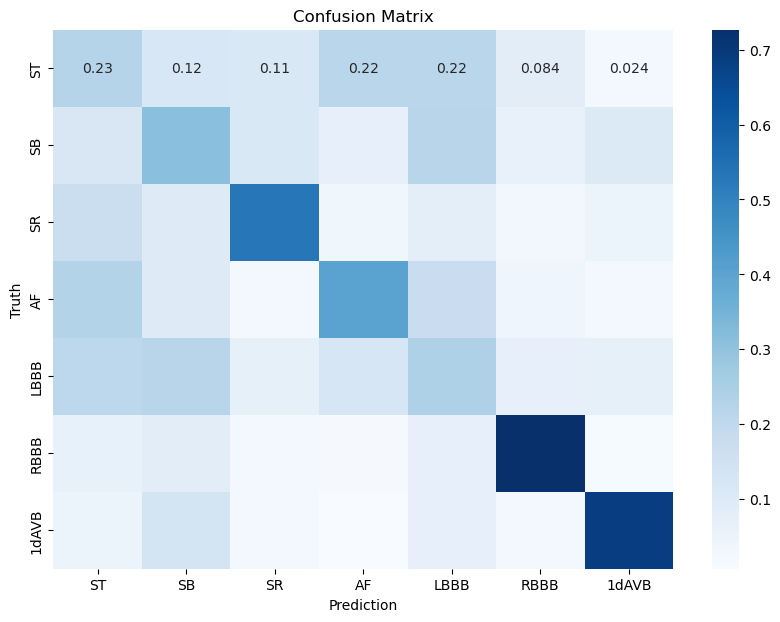

In [47]:
#confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

model_V3.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model_V3(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"], columns=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


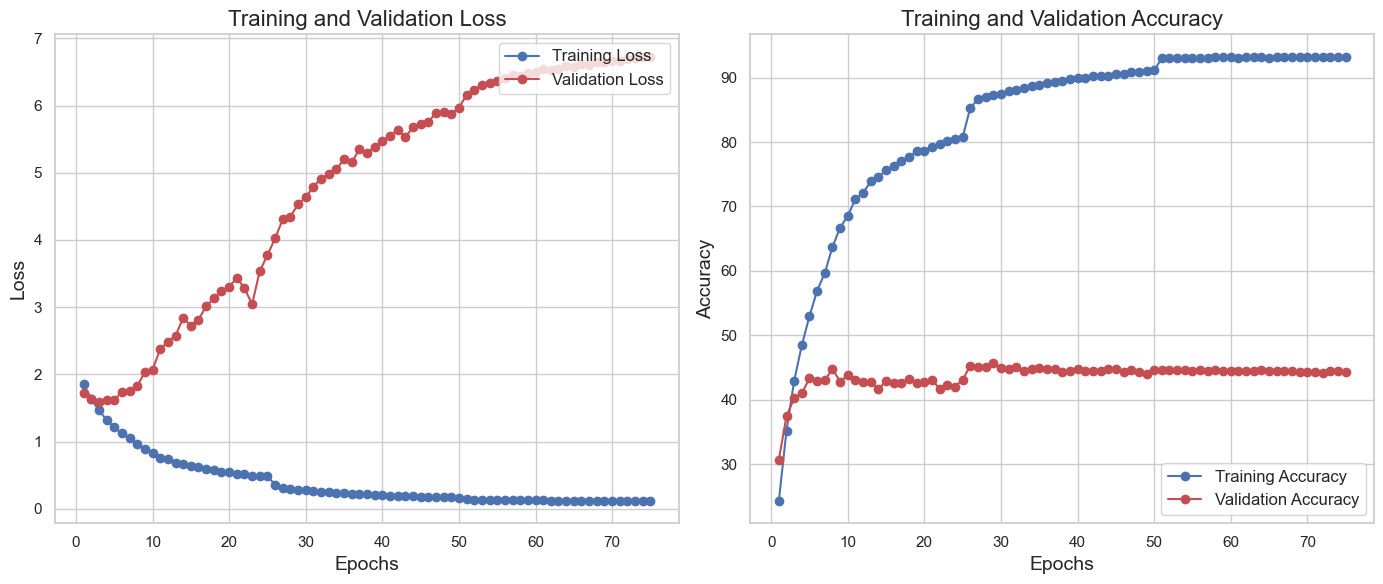

In [52]:
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [56]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR","AF","LBBB","RBBB","1dAVB"]))


              precision    recall  f1-score   support

          ST       0.21      0.23      0.22      1016
          SB       0.29      0.31      0.30       996
          SR       0.58      0.53      0.55       996
          AF       0.45      0.40      0.43       987
        LBBB       0.23      0.24      0.24      1050
        RBBB       0.70      0.73      0.71       991
       1dAVB       0.70      0.69      0.69       964

    accuracy                           0.44      7000
   macro avg       0.45      0.45      0.45      7000
weighted avg       0.45      0.44      0.45      7000

